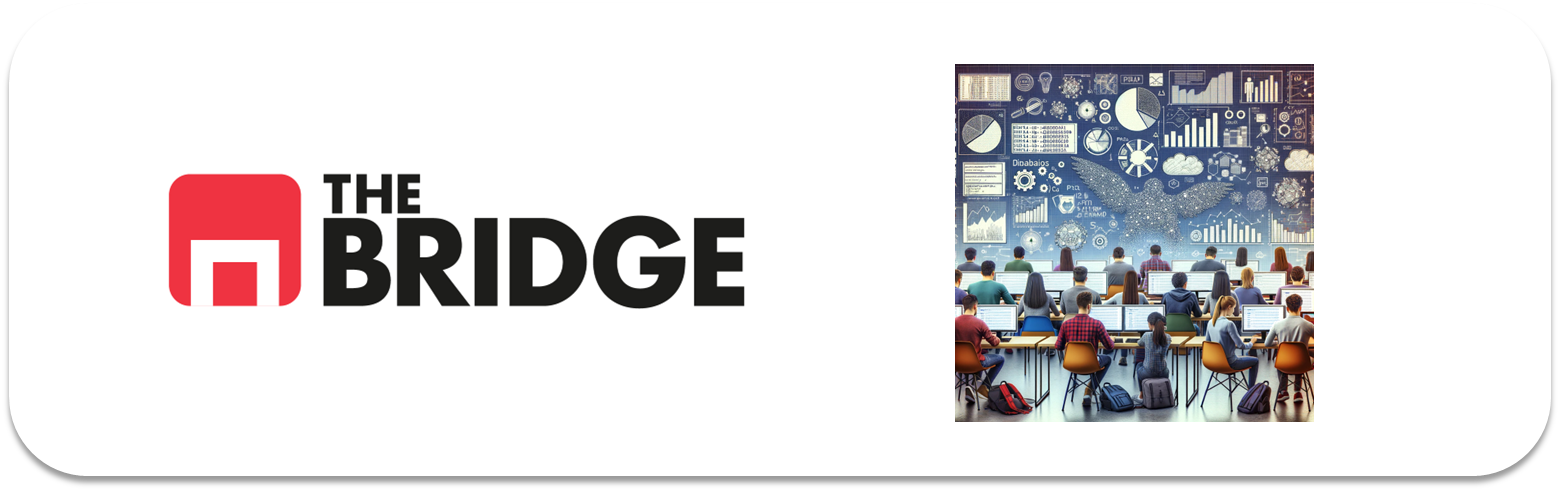

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



---
---
# 1. Data Accquisition
---
---

### 1.1 imports for project

In [1]:
import numpy as np
import pandas as pd
import dstoolbox as tlbx

import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns

from scipy import stats
from scipy.special import inv_boxcox

from sklearn import metrics
from sklearn.preprocessing import PowerTransformer, StandardScaler
from sklearn.linear_model import LinearRegression

---
### 1.2 load dataset

In [2]:
boston_data_raw = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv", sep="|")

---
### 1.3 Initial impression of dataset

In [3]:
boston_data_raw.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston_data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


***Key characteristics:***
- 506 entries
- 12 features
- all numerical variables
- no null values

---
---
# 2. Data Processing
---
---

### 2.1 Define target and features

In [5]:
# define features and target
features = boston_data_raw.columns.to_list()
target = pd.DataFrame(boston_data_raw['MEDV'])

In [6]:
# remove target from features
features.remove('MEDV')

---
### 2.2 Check Target Distribution

Check for reasonably normal distribution so that linear regression model is a valid option

MEDV Skewness: 1.1081
MEDV Excess Kurtosis: -1.5048


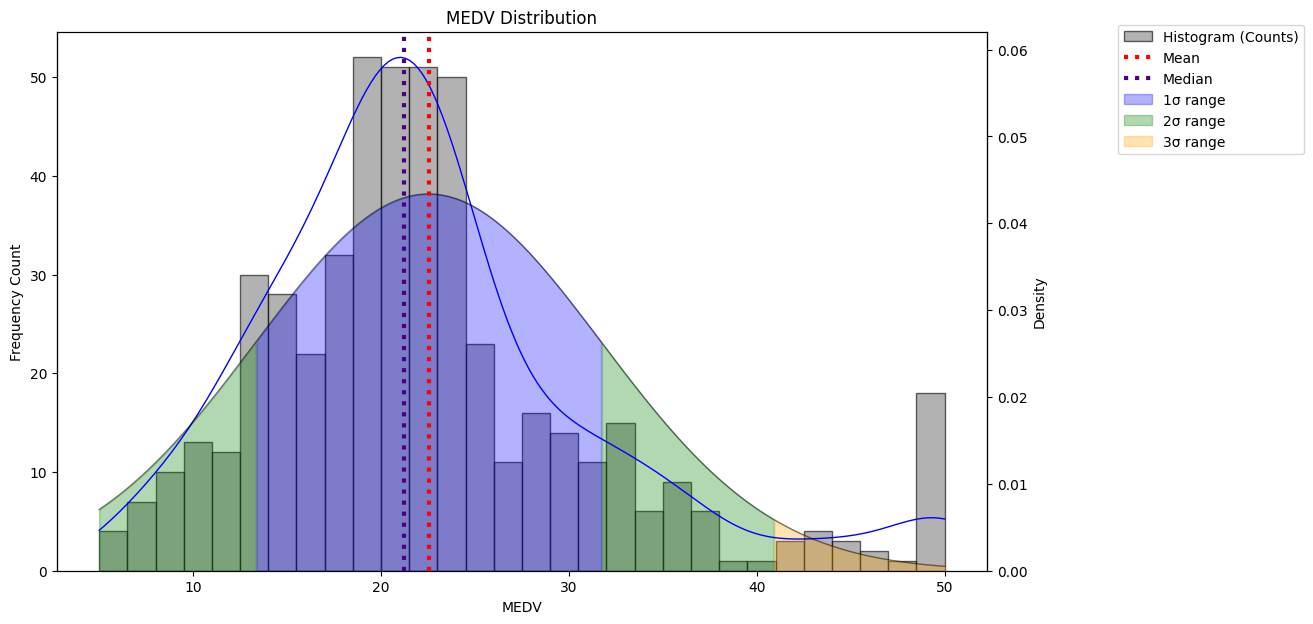

In [7]:
# Visual analysis of target distribution
tlbx.plot_histogram_kde_with_std(boston_data_raw, 'MEDV', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [8]:
boxprops = {'facecolor':colors.to_rgba('blue', 0.5),
            'edgecolor':colors.to_rgba('black', 1),
            'linewidth':0.4,
            'linestyle':'-',
            'zorder':1
            }

whiskerprops = {'color':'black',
               'linewidth':0.6,
               'linestyle':'-',
               'alpha':1,
               'solid_capstyle':None, #(butt, round, projecting)}
               'zorder': 1
               }

capprops = {'color':'black',
               'linewidth':0.6,
               'linestyle':'-',
               'alpha':1,
               'solid_capstyle':None, #(butt, round, projecting)}
               'zorder': 1
               }

medianprops = {'color':'red',
               'linewidth':1.5,
               'linestyle':'--',
               'alpha':1,
               'zorder': 2
               }

flierprops = {'marker':'x', 
              'markersize':5,
              'markerfacecolor':colors.to_rgba('blue', 1),
              'markeredgecolor':colors.to_rgba('blue', 1),
              'markeredgewidth':0.6,
              'zorder':2
              }


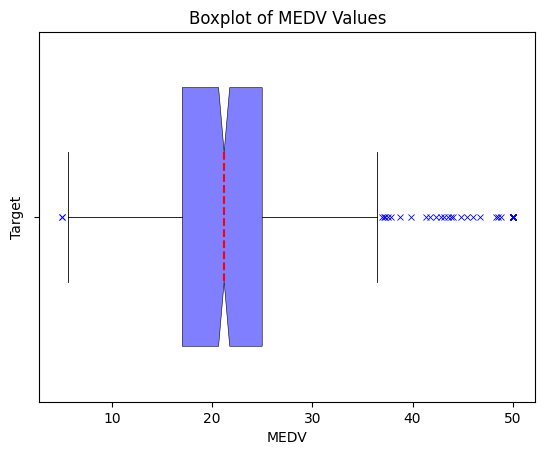

In [9]:
ax = sns.boxplot(boston_data_raw['MEDV'], 
                 notch=True, 
                 orient='h',
                 width=0.7,
                 boxprops=boxprops,
                 whiskerprops=whiskerprops,
                 capprops=capprops,
                 medianprops=medianprops,
                 flierprops=flierprops
                 )

ax.set_ylabel('Target')
ax.set_title(f'Boxplot of MEDV Values')
plt.show()

In [10]:
# Statistical analysis of target distribution
stat, p_value = stats.shapiro(boston_data_raw['MEDV'])

print("Shapiro-Wilk Test:")
print('Statistic:', stat)
print('P-value:', p_value)
print()
print("Statistical Evaluation:")
if p_value < 0.05:
    print("As p-value is < 0.05:\n  Reject null hypothesis.\n  Not enough evidence to suggest data is normally distributed")
else:
    print(f"As p-value is $\\geq$ 0.05:\n  Fail to reject the null hypothesis.\n  Sufficient evidence to suggest data may be normally distributed")

Shapiro-Wilk Test:
Statistic: 0.9171758803890093
P-value: 4.941386258635722e-16

Statistical Evaluation:
As p-value is < 0.05:
  Reject null hypothesis.
  Not enough evidence to suggest data is normally distributed


### 2.2.1 Target Distribution Evaluation
***Visually:***
- relatively large group of extreme high values
- likely causing the kurtosis value
- slightly right skewed
    - possibly try some transformation to get better model fit
        - log
        - Box-Cox
        - Yeo-Johnson

---
### 2.2.2 Target variable transformations

In [11]:
# Apply log transformation to target variable
target['log_MEDV'] = np.log(target['MEDV'])


# Apply boxcox transformation to target variable
target['MEDV_boxcox'], lambda_boxcox = stats.boxcox(target['MEDV'])

# Apply Yeo-Johnson transformation to target
pt = PowerTransformer(method='yeo-johnson')
target['MEDV_YEOJO'] = pt.fit_transform(target[['MEDV']])

---
### 2.2.3 Evaluate target transformations

##### Log_MEDV evaluation

log_MEDV Skewness: -0.3303
log_MEDV Excess Kurtosis: -2.1926


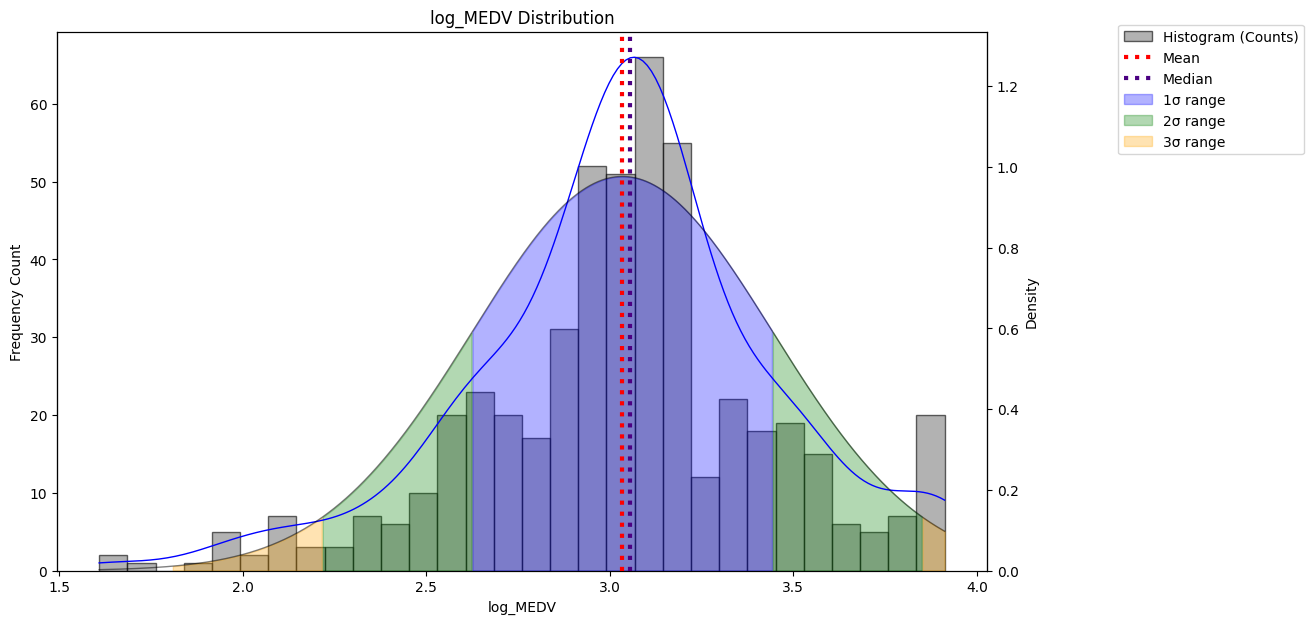

In [12]:
# Visualise distributions
tlbx.plot_histogram_kde_with_std(target, 'log_MEDV', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [13]:
# Statistical evaluation of log_MEDV distribution
stat, p_value = stats.shapiro(target['log_MEDV'])

print("Shapiro-Wilk Test:")
print('Statistic:', stat)
print('P-value:', p_value)
print()
print("Statistical Evaluation:")
if p_value < 0.05:
    print("As p-value is < 0.05:\n  Reject null hypothesis.\n  Not enough evidence to suggest data is normally distributed")
else:
    print(f"As p-value is $\\geq$ 0.05:\n  Fail to reject the null hypothesis.\n  Sufficient evidence to suggest data may be normally distributed")

Shapiro-Wilk Test:
Statistic: 0.9757386401202984
P-value: 1.9354268611078725e-07

Statistical Evaluation:
As p-value is < 0.05:
  Reject null hypothesis.
  Not enough evidence to suggest data is normally distributed


---
##### boxcox_MEDV evaluation

MEDV_boxcox Skewness: 0.0159
MEDV_boxcox Excess Kurtosis: -2.4635


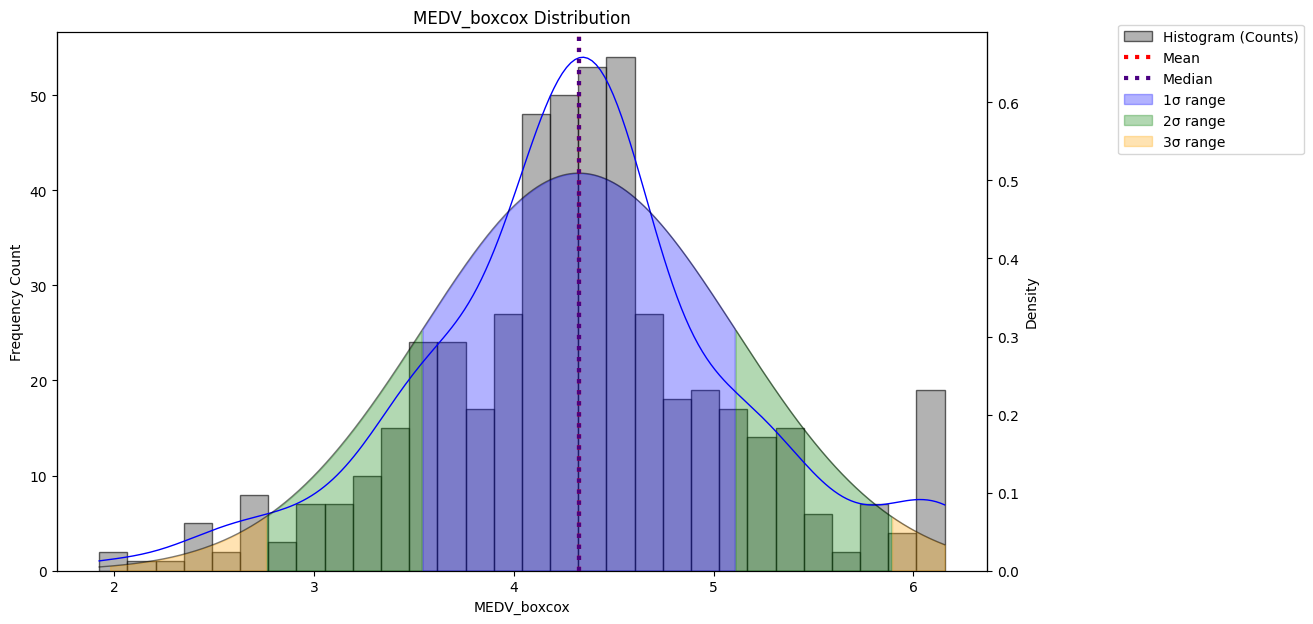

In [14]:
# visualise distirbution
tlbx.plot_histogram_kde_with_std(target, 'MEDV_boxcox', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

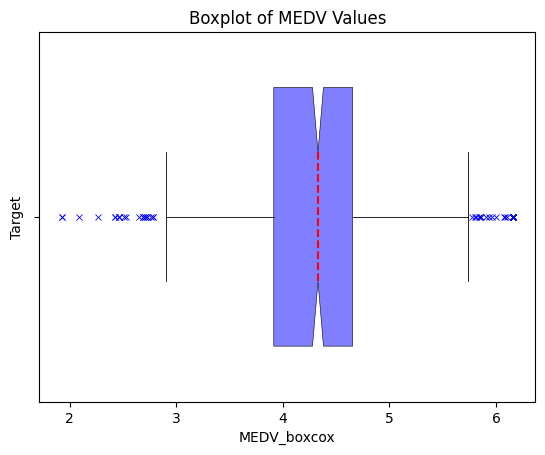

In [15]:
ax = sns.boxplot(target['MEDV_boxcox'], 
                 notch=True, 
                 orient='h',
                 width=0.7,
                 boxprops=boxprops,
                 whiskerprops=whiskerprops,
                 capprops=capprops,
                 medianprops=medianprops,
                 flierprops=flierprops
                 )

ax.set_ylabel('Target')
ax.set_title(f'Boxplot of MEDV Values')
plt.show()

- Shifted outliers to both ends of the distribution.
- Improves symmetry

In [16]:
# Statistical evaluation of boxcox_MEDV distribution
stat, p_value = stats.shapiro(target['MEDV_boxcox'])

print("Shapiro-Wilk Test:")
print('Statistic:', stat)
print('P-value:', p_value)
print()
print("Statistical Evaluation:")
if p_value < 0.05:
    print("As p-value is < 0.05:\n  Reject null hypothesis.\n  Not enough evidence to suggest data is normally distributed")

Shapiro-Wilk Test:
Statistic: 0.98002847012561
P-value: 2.0404640680917056e-06

Statistical Evaluation:
As p-value is < 0.05:
  Reject null hypothesis.
  Not enough evidence to suggest data is normally distributed


---
##### MEDV_YEOJO transformation

MEDV_YEOJO Skewness: 0.0112
MEDV_YEOJO Excess Kurtosis: -2.4875


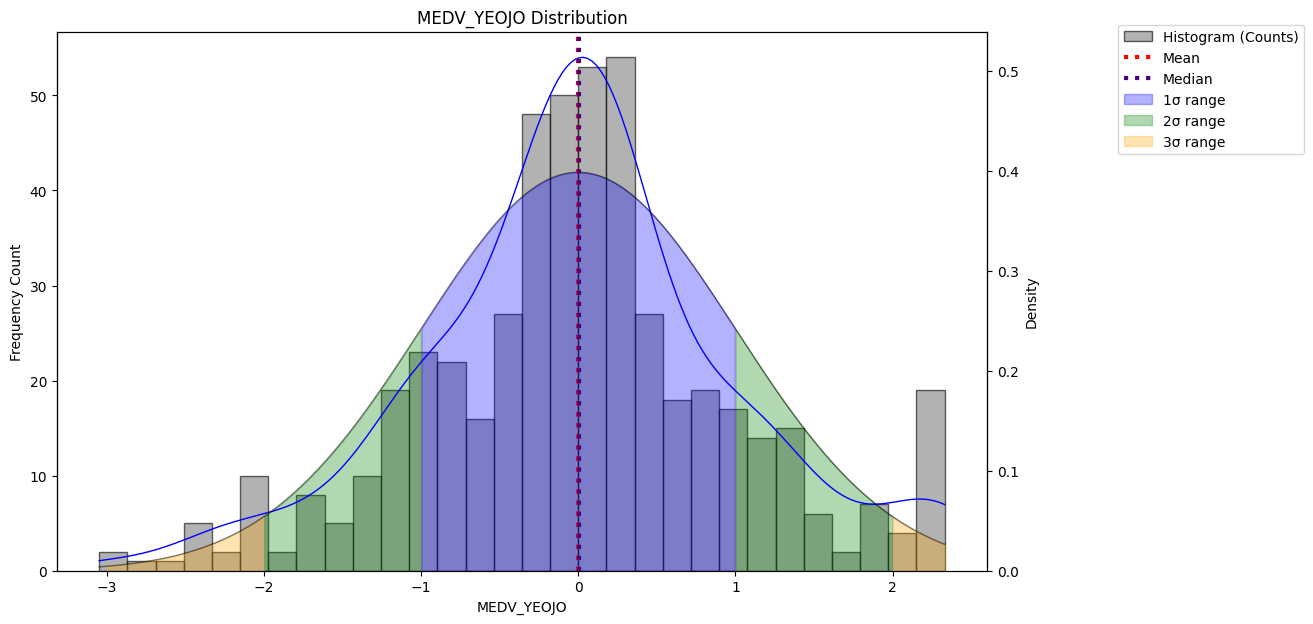

In [17]:
# visualise distirbution
tlbx.plot_histogram_kde_with_std(target, 'MEDV_YEOJO', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

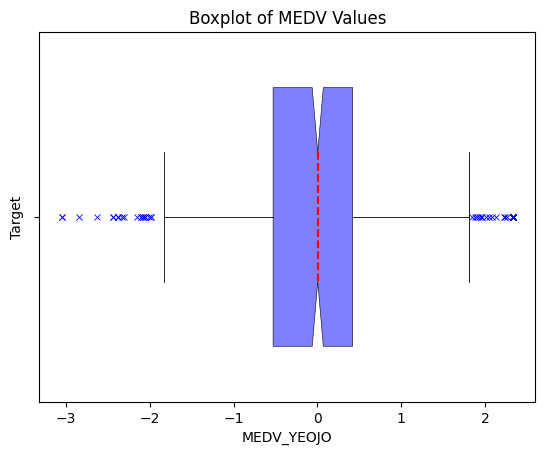

In [18]:
ax = sns.boxplot(target['MEDV_YEOJO'], 
                 notch=True, 
                 orient='h',
                 width=0.7,
                 boxprops=boxprops,
                 whiskerprops=whiskerprops,
                 capprops=capprops,
                 medianprops=medianprops,
                 flierprops=flierprops
                 )

ax.set_ylabel('Target')
ax.set_title(f'Boxplot of MEDV Values')
plt.show()

In [19]:
# Statistical evaluation of boxcox_MEDV distribution
stat, p_value = stats.shapiro(target['MEDV_YEOJO'])

print("Shapiro-Wilk Test:")
print('Statistic:', stat)
print('P-value:', p_value)
print()
print("Statistical Evaluation:")
if p_value < 0.05:
    print("As p-value is < 0.05:\n  Reject null hypothesis.\n  Not enough evidence to suggest data is normally distributed")

Shapiro-Wilk Test:
Statistic: 0.980422530779598
P-value: 2.5663763248227534e-06

Statistical Evaluation:
As p-value is < 0.05:
  Reject null hypothesis.
  Not enough evidence to suggest data is normally distributed


---
##### 2.2.4 Transformations analysis

***Improving symmetry (Skewness):***
- log_MEDV transformation reduces skewness and improves symmetry of the data.
- log_MEDV pushed distribution slightly left
- boxcox_MEDV transformation further reduced skewness and provides the most symmetrical distribution
- Yeo-Johnson transformation further reduced skewness

***Tail losses (Kurtosis):***  
- excess kurtosis = kurtosis - 3
- normal distribution excess kurtosis = 0
- both log and boxcox transformations moved excess kurtosis more negative
- make the tails thinner and further away from a normal tail distribution.
    - implication: less likely to emphasise extreme values
- Yeo-Johnson thinned out the tails even more.

***Transformation Selcetion:***
- MEDV with no transformation
- boxcox_MEDV as showed improved symmetry.
- Yeo-Johnson showed improved symmetry on top of boxcox but tail thinning even more pronounced. See what effect this tail thinning has.

---
### 2.4 Data Splitting

In [20]:
# split data into X_train, X-test, y_train, y_test. 20% in test
from sklearn.model_selection import train_test_split

X = boston_data_raw[features]
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

---
---
# 3. EDA of Train Features
---
---

### 3.1 Descriptive overview

In [21]:
# overview of quick stats
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.705951,12.077970,10.817252,0.069307,0.551880,6.298045,67.887376,3.860947,9.413366,402.262376,18.418812,12.589381
std,9.045348,24.352498,6.793734,0.254290,0.116359,0.732815,28.716199,2.143441,8.661539,167.393195,2.149371,7.307937
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.137000,1.000000,187.000000,12.600000,1.730000
25%,0.078935,0.000000,5.085000,0.000000,0.448000,5.883000,42.050000,2.106075,4.000000,278.500000,17.000000,6.702500
50%,0.256510,0.000000,8.560000,0.000000,0.524000,6.198500,77.750000,3.298600,5.000000,329.000000,18.850000,11.300000
75%,3.489463,18.500000,18.100000,0.000000,0.624000,6.630250,94.300000,5.287300,24.000000,666.000000,20.200000,16.992500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000


- probably going to want to use StandardScaler further down the line...

---
### 3.2 Distributions

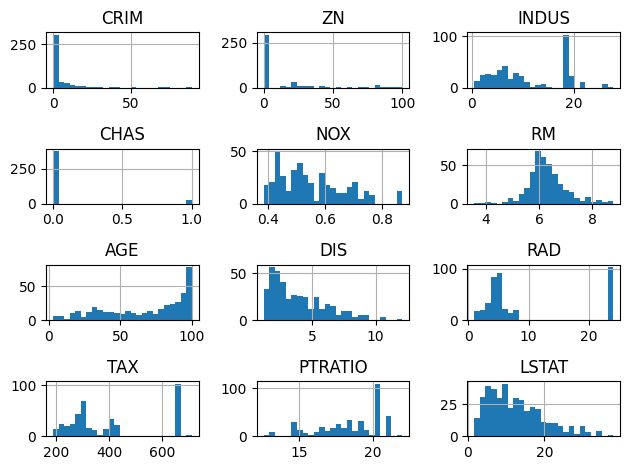

In [22]:
# visualise each features distribution
X_train.hist(bins=25)
plt.tight_layout()

In [23]:
X_train.CHAS.value_counts()

0.0    376
1.0     28
Name: CHAS, dtype: int64

Looks like quite a lot of transformation can be done to the features.  

***Initial Ideas:***
NOX: 
    Bins --> 3 cats 0, 0.5, 0.8  

RM: 
    Looks quite normal. Leave it alone?  

Age: 
    Not normal at all. Very left skewed. not sure what to do with it  

DIS: 
    right skewed. COuld try boxcox or log?  

RAD: 
    strange. investigate high peak. Possibly split into two categories.  

TAX: 
    Bin into 3?  

PTRATIO: 
    See if theres any correlation. delete?  

LSTAT: 
    right skewed. could be another good candidate for log, boxcox or yeo-jo transformation

---
### 3.3 Correlation with target

In [24]:
# Create individual Series of correlation between each of the targets (MEDV and transformations) with each feature
MEDV_corr_coef = X_train.corrwith(y_train['MEDV'], numeric_only=True)
log_MEDV_corr_coef = X_train.corrwith(y_train['log_MEDV'], numeric_only=True)
MEDV_boxcox_corr_coef = X_train.corrwith(y_train['MEDV_boxcox'], numeric_only=True)
MEDV_YEOJO_corr_coef = X_train.corrwith(y_train['MEDV_YEOJO'], numeric_only=True)

# Create a dataframe for quick easy checking of correlation feature by feature
# Just to help me to understand how the transformations might affect correlations
corr_coefs = pd.DataFrame({
    'MEDV': MEDV_corr_coef,
    'log_MEDV': log_MEDV_corr_coef,
    'MEDV_boxcox': MEDV_boxcox_corr_coef,
    'MEDV_YEOJO': MEDV_YEOJO_corr_coef},
    index=(X_train.columns))

In [25]:
MEDV_corr_coef.sort_values(ascending=True)

LSTAT     -0.742183
PTRATIO   -0.539101
TAX       -0.490843
INDUS     -0.478621
NOX       -0.422743
RAD       -0.415672
CRIM      -0.394606
AGE       -0.368577
CHAS       0.155435
DIS        0.240963
ZN         0.357524
RM         0.721725
dtype: float64

In [26]:
log_MEDV_corr_coef.sort_values(ascending=True)

LSTAT     -0.805961
TAX       -0.581814
INDUS     -0.535665
CRIM      -0.531785
PTRATIO   -0.527500
RAD       -0.518734
NOX       -0.506042
AGE       -0.444082
CHAS       0.139259
DIS        0.333110
ZN         0.359822
RM         0.645394
dtype: float64

log transformation increased (or decreased depending how its thought about) correlation coefficient for anything negatively correlated with target MEDV.

In [27]:
MEDV_boxcox_corr_coef.sort_values(ascending=True)

LSTAT     -0.799621
TAX       -0.567345
PTRATIO   -0.535862
INDUS     -0.529535
CRIM      -0.503096
RAD       -0.500439
NOX       -0.493433
AGE       -0.433316
CHAS       0.143353
DIS        0.316375
ZN         0.364095
RM         0.669350
dtype: float64

In [28]:
MEDV_YEOJO_corr_coef.sort_values(ascending=True)

LSTAT     -0.800227
TAX       -0.568135
PTRATIO   -0.536012
INDUS     -0.530320
CRIM      -0.503311
RAD       -0.501198
NOX       -0.494361
AGE       -0.434320
CHAS       0.143110
DIS        0.317210
ZN         0.364434
RM         0.669045
dtype: float64

---
### 3.4 Correlations between features

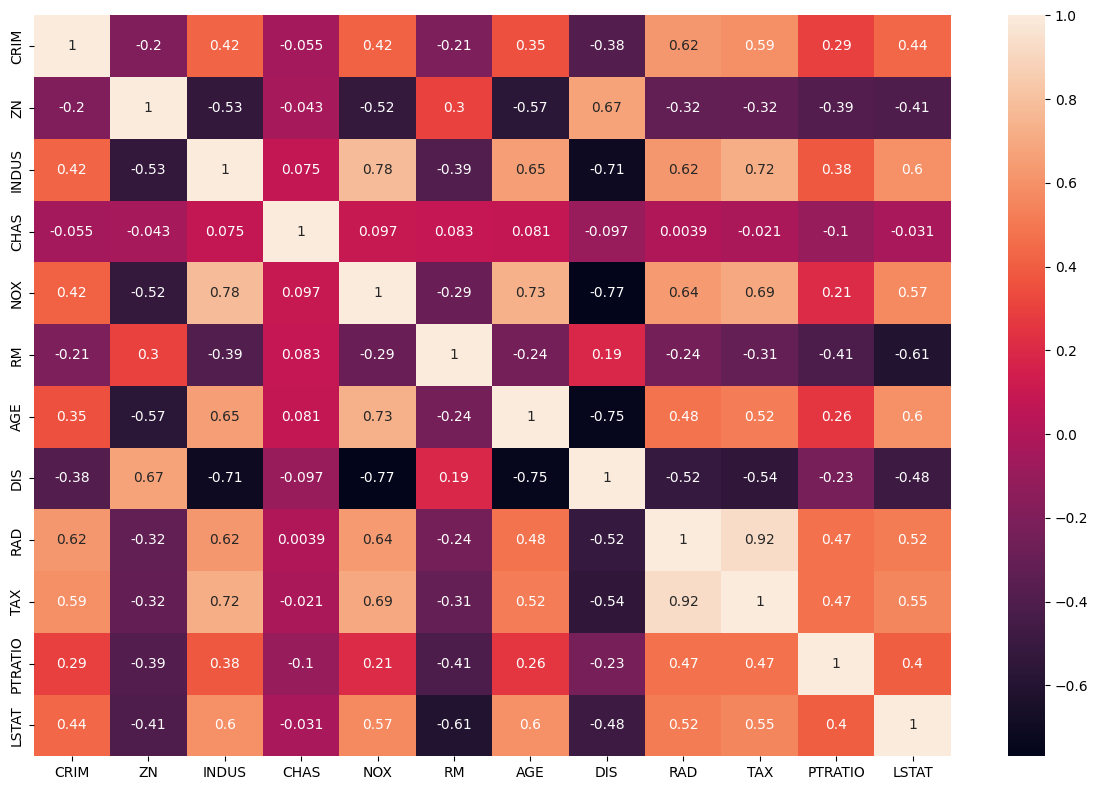

In [29]:
plt.subplots(figsize=(12,8))
sns.heatmap(X_train.corr(numeric_only=True), annot=True)
plt.tight_layout()
plt.show()

***Initial Ideas:***
- DIS: Probably a good idea to remove  
    - very strong negative correlates with AGE, NOX and INUDS
    - medium to strong negative correlations with LSTAT, TAX, RAD
    

***Significant Features Selection:***  
- Going to keep the following all features with an asbolute correlation coefficient over 0.5
- Dont want to overcomplicate the model and it will make cleaning/transformations more manageable

sig_features = ['LSTAT','INDUS','TAX','CRIM','NOX','RM']

In [30]:
# Create variable of significant features
sig_features = ['LSTAT','INDUS','TAX','CRIM','NOX','RM']

In [31]:
# Keep only significant features to be used in the model 
X_train = X_train[sig_features]
X_test = X_test[sig_features]

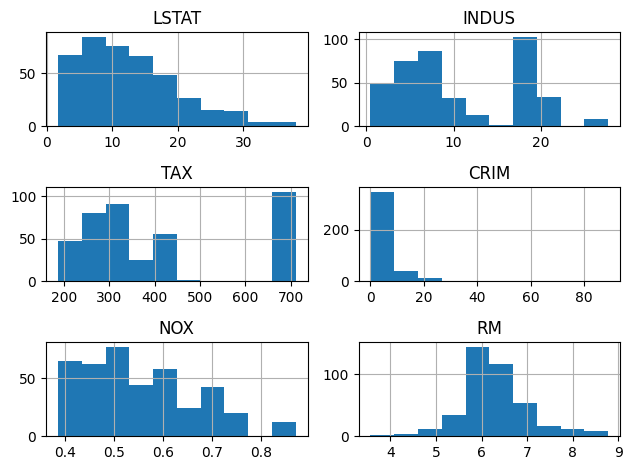

In [32]:
X_train.hist()
plt.tight_layout()
plt.show()

---
### 3.4 Feature Transformations

As linear regression models assume data to be normally distributed i will try transforming the features to get them closer to normal distribution

---
##### Log Transform 'NOX'

NOX Skewness: 0.7580
NOX Excess Kurtosis: -3.074


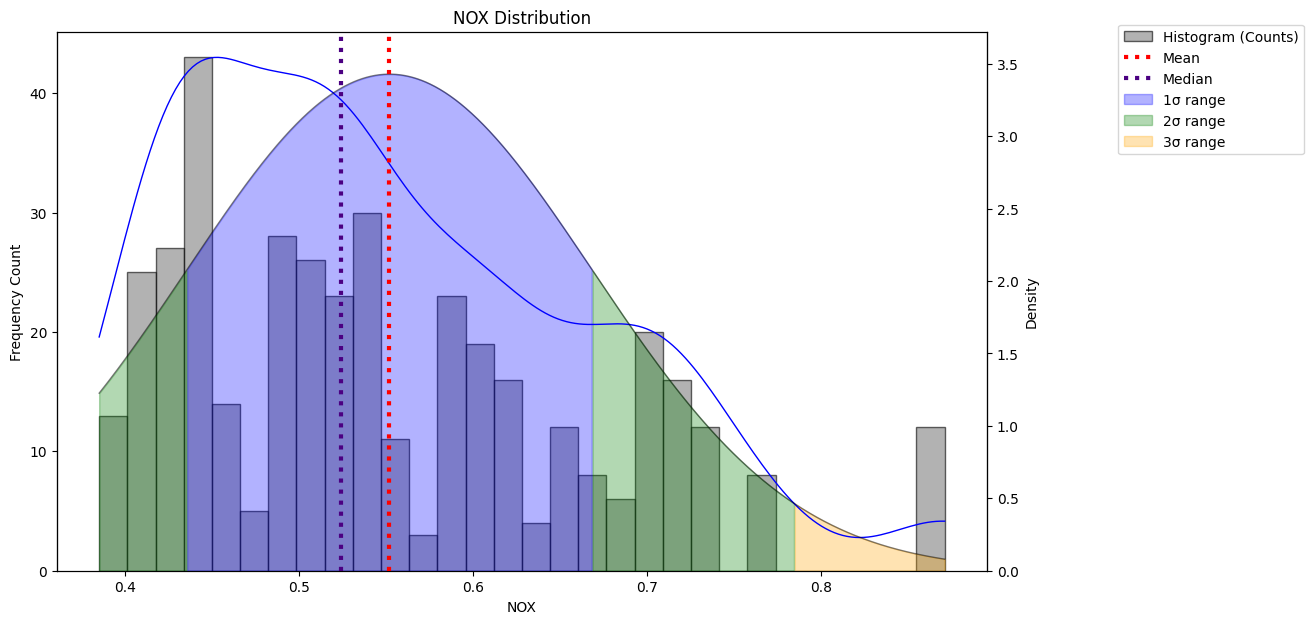

In [33]:
# View NOX distribution for 
tlbx.plot_histogram_kde_with_std(X_train, 'NOX', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [34]:
# Apply log transformation to NOX
X_train['log_NOX'] = np.log(X_train['NOX'])

log_NOX Skewness: 0.3959
log_NOX Excess Kurtosis: -3.727


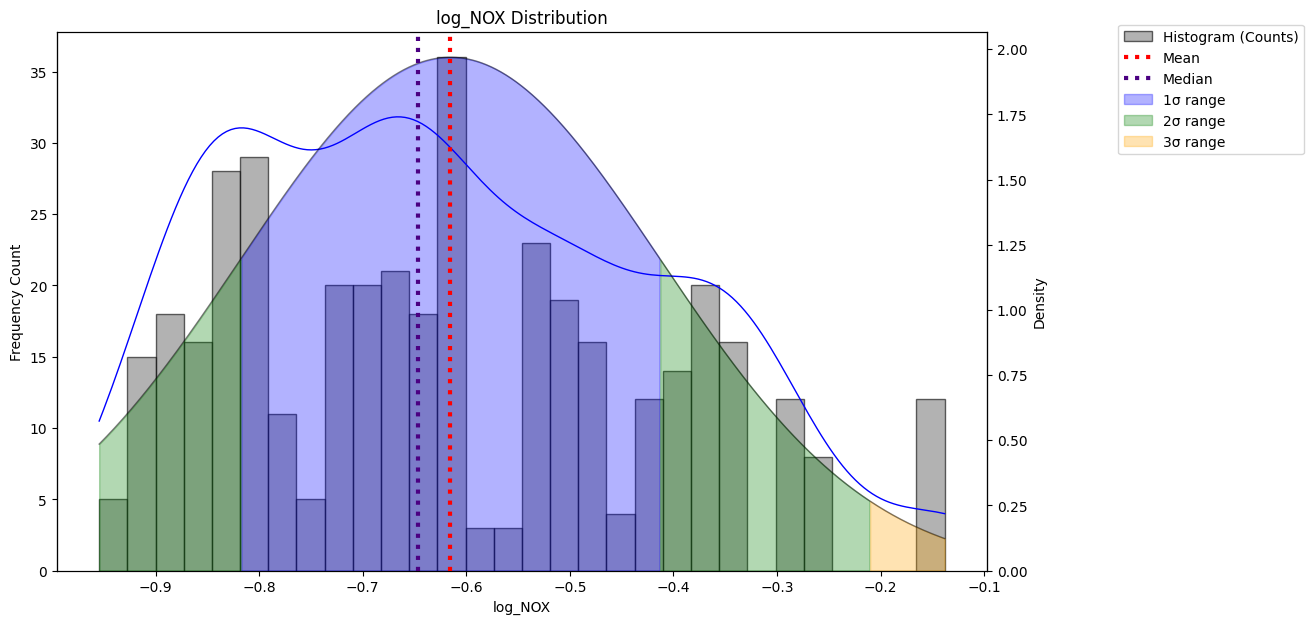

In [35]:
# Visualise the log distributions and skewness and kurtosis stats
tlbx.plot_histogram_kde_with_std(X_train, 'log_NOX', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [36]:
# Check to see how this affected correlation with target
print(f"Corr Coef NOX|MEDV: {X_train['NOX'].corr(y_train['MEDV'])}")
print(f"Corr Coef log_NOX|MEDV: {X_train['log_NOX'].corr(y_train['MEDV'])}")
print(f"Corr Coef log_NOX|log_MEDV: {X_train['log_NOX'].corr(y_train['log_MEDV'])}")
print()
print(f"Corr Coef NOX|MEDV_boxcox: {X_train['NOX'].corr(y_train['MEDV_boxcox'])}")
print(f"Corr Coef log_NOX|MEDV_boxcox: {X_train['log_NOX'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef NOX|MEDV_YEOJO: {X_train['NOX'].corr(y_train['MEDV_YEOJO'])}")
print(f"Corr Coef log_NOX|MEDV_YEOJO: {X_train['log_NOX'].corr(y_train['MEDV_YEOJO'])}")



Corr Coef NOX|MEDV: -0.42274260020110244
Corr Coef log_NOX|MEDV: -0.4265187499889259
Corr Coef log_NOX|log_MEDV: -0.5110414317800654

Corr Coef NOX|MEDV_boxcox: -0.49343301744809603
Corr Coef log_NOX|MEDV_boxcox: -0.49827025719839163

Corr Coef NOX|MEDV_YEOJO: -0.49436122500868573
Corr Coef log_NOX|MEDV_YEOJO: -0.499217347575409


- for all target transformations stronger correlation with log_nox
- log transformation improved symmetry but slightly inceased excess kurtosis
- Going to try using log_nox as it seems to have brought the distribution closer to normal

---
##### boxcox Transformation of NOX

In [37]:
# Try applying boxcox transformation to NOX
X_train['boxcox_NOX'], lambda_boxcox = stats.boxcox(X_train['NOX'])


boxcox_NOX Skewness: 0.0705
boxcox_NOX Excess Kurtosis: -4.0099


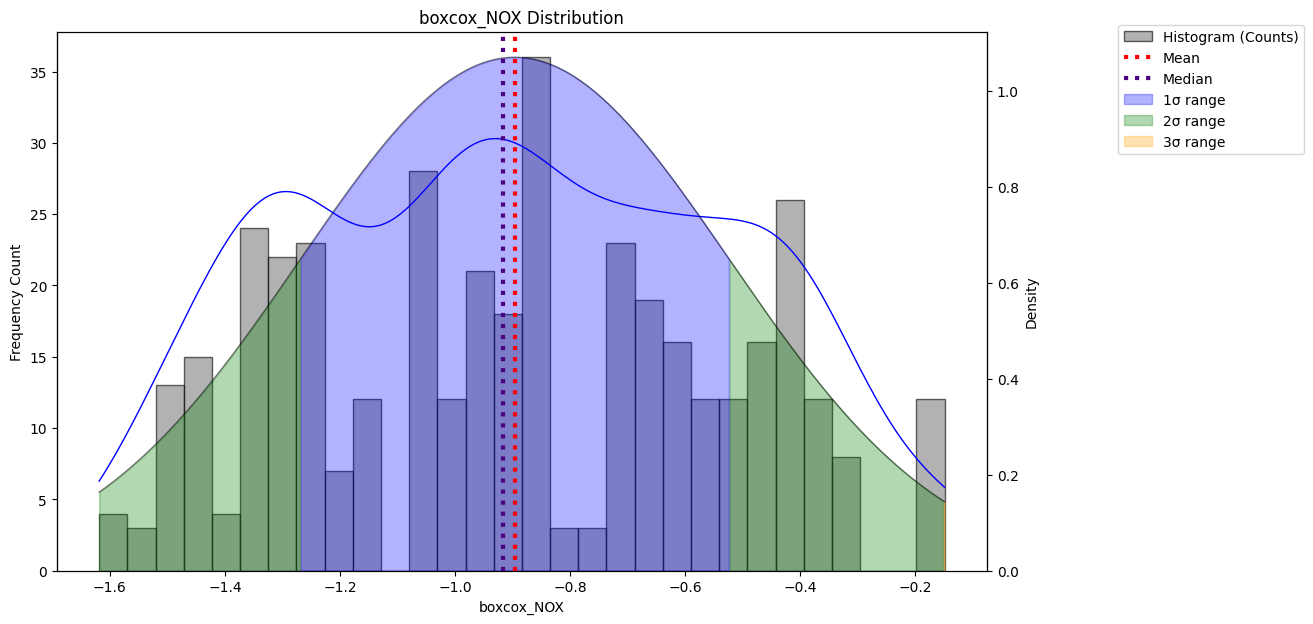

In [38]:
tlbx.plot_histogram_kde_with_std(X_train, 'boxcox_NOX', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [39]:
# Check to see how this affected correlation with target
print(f"Corr Coef NOX|MEDV: {X_train['NOX'].corr(y_train['MEDV'])}")
print(f"Corr Coef boxcox_NOX|MEDV: {X_train['boxcox_NOX'].corr(y_train['MEDV'])}")
print(f"Corr Coef boxcox_NOX|boxcox_MEDV: {X_train['boxcox_NOX'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef NOX|MEDV_boxcox: {X_train['NOX'].corr(y_train['MEDV_boxcox'])}")
print(f"Corr Coef boxcox_NOX|MEDV_boxcox: {X_train['boxcox_NOX'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef NOX|MEDV_YEOJO: {X_train['NOX'].corr(y_train['MEDV_YEOJO'])}")
print(f"Corr Coef boxcox_NOX|MEDV_YEOJO: {X_train['boxcox_NOX'].corr(y_train['MEDV_YEOJO'])}")

Corr Coef NOX|MEDV: -0.42274260020110244
Corr Coef boxcox_NOX|MEDV: -0.4241400245785153
Corr Coef boxcox_NOX|boxcox_MEDV: -0.4950329911351412

Corr Coef NOX|MEDV_boxcox: -0.49343301744809603
Corr Coef boxcox_NOX|MEDV_boxcox: -0.4950329911351412

Corr Coef NOX|MEDV_YEOJO: -0.49436122500868573
Corr Coef boxcox_NOX|MEDV_YEOJO: -0.49598232131640235


- log_NOX had a better overall improvement to correlations/distribution stats than boxcox
- doesnt seem worth using boxcox_NOX for the tiniest of correlation gain when i quite significantly increase excess kurtosis

---
##### Log Transform 'CRIM'

CRIM Skewness: 5.2619
CRIM Excess Kurtosis: 33.6302


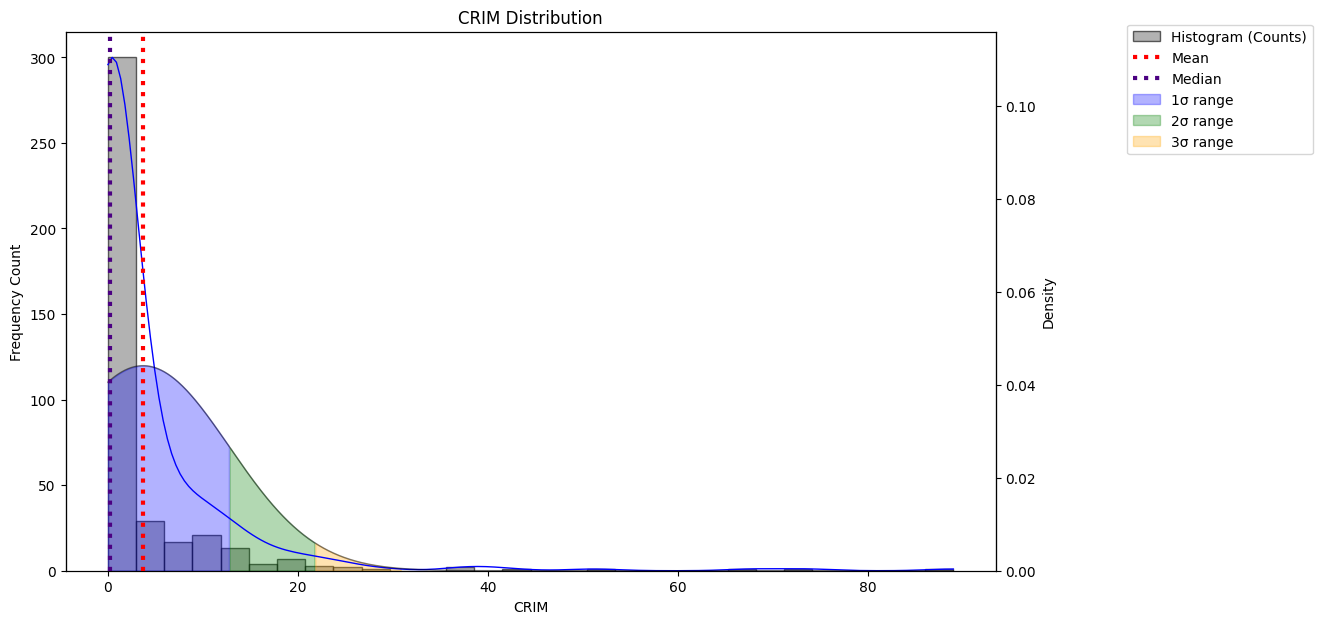

In [40]:
# View CRIM distribution for 
tlbx.plot_histogram_kde_with_std(X_train, 'CRIM', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [41]:
# Apply log transformation to CRIM
X_train['log_CRIM'] = np.log(X_train['CRIM'])

log_CRIM Skewness: 0.4059
log_CRIM Excess Kurtosis: -3.9831


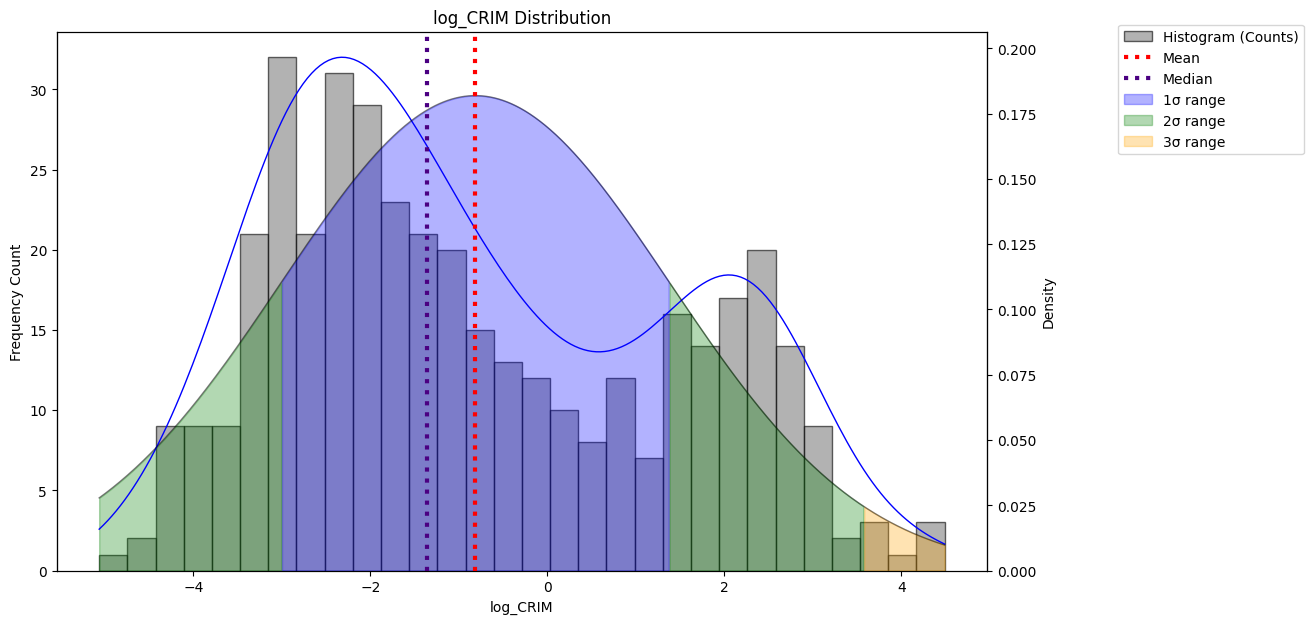

In [42]:
# View log_CRIM distribution for 
tlbx.plot_histogram_kde_with_std(X_train, 'log_CRIM', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [43]:
# Check to see how this affected correlation with target
X_train['log_CRIM'].corr(y_train['MEDV'])


-0.47684688561995314

In [44]:
# Check to see how this affected correlation with target
print(f"Corr Coef CRIM|MEDV: {X_train['CRIM'].corr(y_train['MEDV'])}")
print(f"Corr Coef log_CRIM|MEDV: {X_train['log_CRIM'].corr(y_train['MEDV'])}")
print(f"Corr Coef log_CRIM|log_MEDV: {X_train['log_CRIM'].corr(y_train['log_MEDV'])}")
print()
print(f"Corr Coef CRIM|MEDV_boxcox: {X_train['CRIM'].corr(y_train['MEDV_boxcox'])}")
print(f"Corr Coef log_CRIM|MEDV_boxcox: {X_train['log_CRIM'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef CRIM|MEDV_YEOJO: {X_train['CRIM'].corr(y_train['MEDV_YEOJO'])}")
print(f"Corr Coef log_CRIM|MEDV_YEOJO: {X_train['log_CRIM'].corr(y_train['MEDV_YEOJO'])}")



Corr Coef CRIM|MEDV: -0.3946057328222797
Corr Coef log_CRIM|MEDV: -0.47684688561995314
Corr Coef log_CRIM|log_MEDV: -0.5917419362660147

Corr Coef CRIM|MEDV_boxcox: -0.5030960941416791
Corr Coef log_CRIM|MEDV_boxcox: -0.572132669677031

Corr Coef CRIM|MEDV_YEOJO: -0.5033107935146087
Corr Coef log_CRIM|MEDV_YEOJO: -0.5731059889979285


- log transformation to CRIM massively reduced skewness
- massive improvement to kurtosis as well
- improved correlations for all target transformations
- going to use log_CRIM

---
##### Log Transform 'LSTAT'

LSTAT Skewness: 0.8983
LSTAT Excess Kurtosis: -2.6184


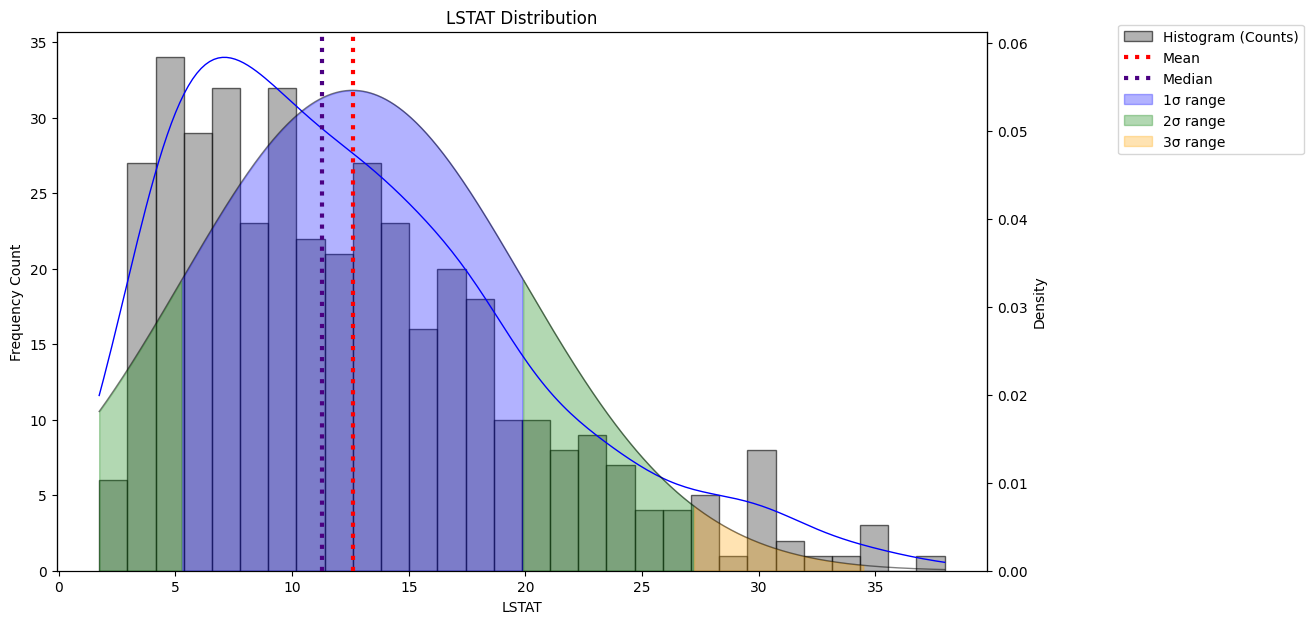

In [45]:
# View CRIM distribution for 
tlbx.plot_histogram_kde_with_std(X_train, 'LSTAT', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [46]:
# Apply log transformation to CRIM
X_train['log_LSTAT'] = np.log(X_train['LSTAT'])

log_LSTAT Skewness: -0.3017
log_LSTAT Excess Kurtosis: -3.5135


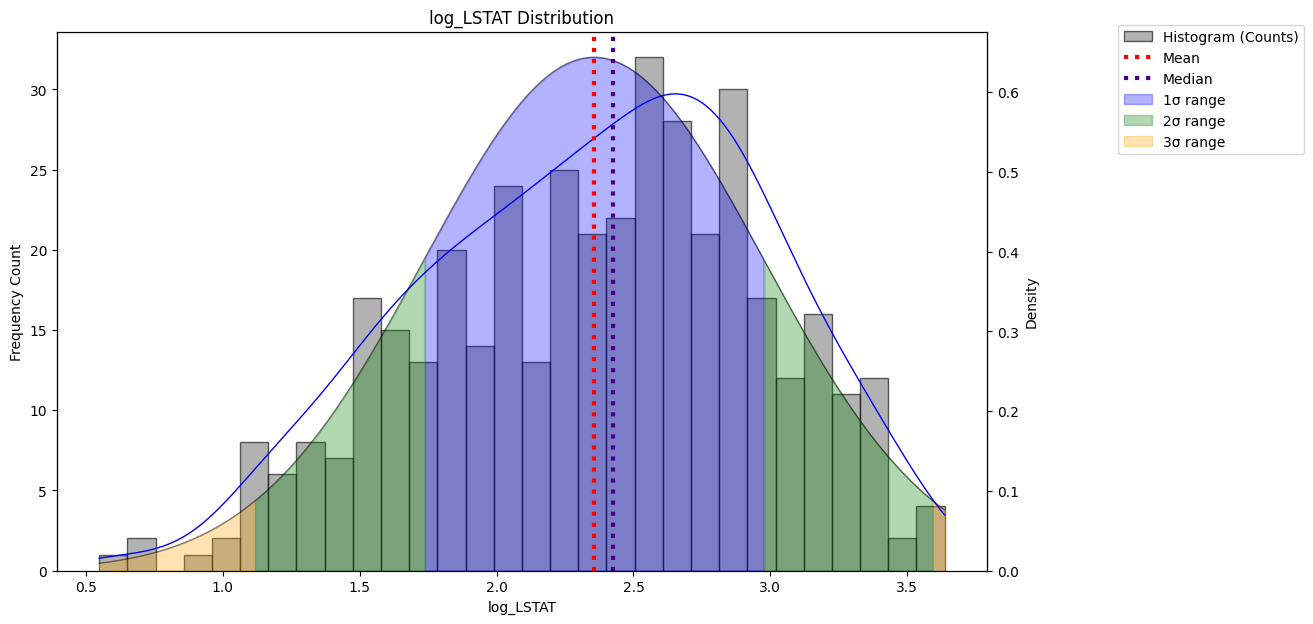

In [47]:
# View log_LSTAT distribution for 
tlbx.plot_histogram_kde_with_std(X_train, 'log_LSTAT', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

---
##### boxcox transformation of LSTAT

In [48]:
# Try applying boxcox transformation to LSTAT
X_train['boxcox_LSTAT'], lambda_boxcox = stats.boxcox(X_train['LSTAT'])


boxcox_LSTAT Skewness: -0.0301
boxcox_LSTAT Excess Kurtosis: -3.6615


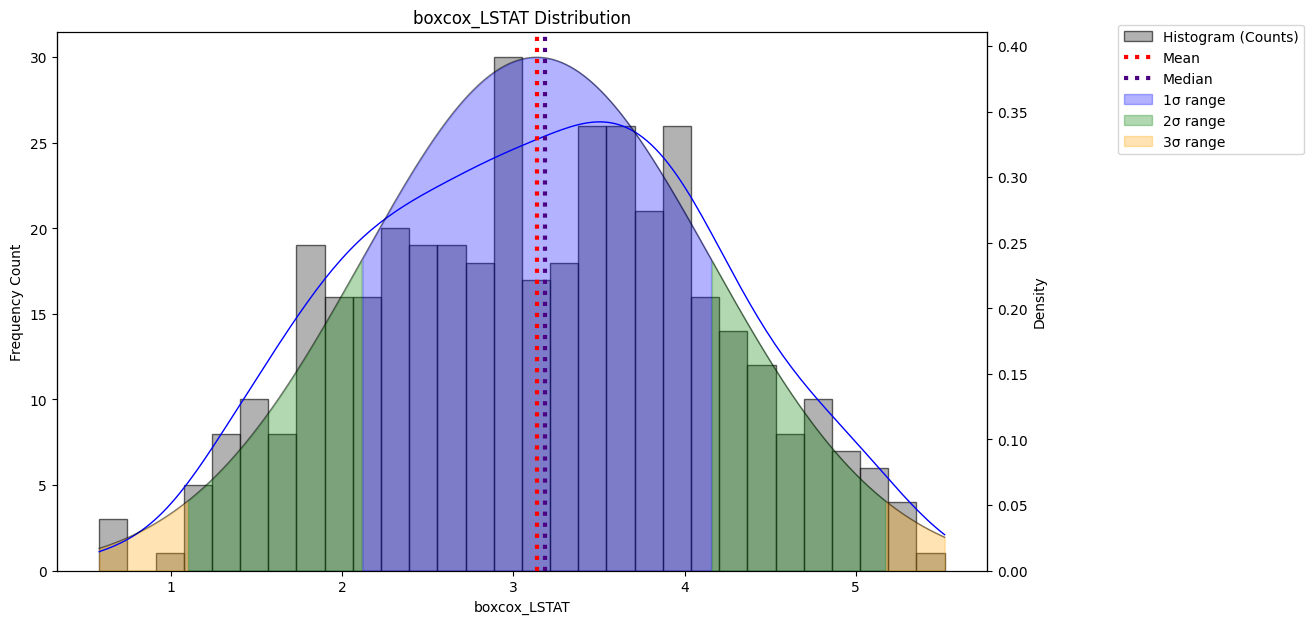

In [49]:
tlbx.plot_histogram_kde_with_std(X_train, 'boxcox_LSTAT', kde=True, normal_distribution=True, mean=True, median=True, print_measures=True)

In [50]:
# Check to see how this affected correlation with target
print(f"Corr Coef LSTAT|MEDV: {X_train['LSTAT'].corr(y_train['MEDV'])}")
print(f"Corr Coef boxcox_LSTAT|MEDV: {X_train['boxcox_LSTAT'].corr(y_train['MEDV'])}")
print(f"Corr Coef boxcox_LSTAT|boxcox_MEDV: {X_train['boxcox_LSTAT'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef LSTAT|MEDV_boxcox: {X_train['LSTAT'].corr(y_train['MEDV_boxcox'])}")
print(f"Corr Coef boxcox_LSTAT|MEDV_boxcox: {X_train['boxcox_LSTAT'].corr(y_train['MEDV_boxcox'])}")
print()
print(f"Corr Coef LSTAT|MEDV_YEOJO: {X_train['LSTAT'].corr(y_train['MEDV_YEOJO'])}")
print(f"Corr Coef boxcox_LSTAT|MEDV_YEOJO: {X_train['boxcox_LSTAT'].corr(y_train['MEDV_YEOJO'])}")

Corr Coef LSTAT|MEDV: -0.7421826253401785
Corr Coef boxcox_LSTAT|MEDV: -0.8172836141152888
Corr Coef boxcox_LSTAT|boxcox_MEDV: -0.8394235637456028

Corr Coef LSTAT|MEDV_boxcox: -0.7996207934620467
Corr Coef boxcox_LSTAT|MEDV_boxcox: -0.8394235637456028

Corr Coef LSTAT|MEDV_YEOJO: -0.8002268872349577
Corr Coef boxcox_LSTAT|MEDV_YEOJO: -0.8398364164999961


- boxcox transformation improves skewness of LSTAT but slightly increase the excess kurtosis
- ??? CONCERN: Will increasing the excess kurtosis of features and targets massively reduce the model capacity to predict more extreme values ???
- Correlation coefficients have increased for all target transformations.

---
#### 3.5 Final Feature Selection
Although there are more transformations that could be investigated, for now I am going to continue to build the model on the following features:
- log_NOX
- log_CRIM
- boxcox_LSTAT
- INDUS
- TAX
- RM
trans_sig_features = ['log_NOX','log_CRIM','boxcos_LSTAT','INDUS','TAX','RM']

In [51]:
trans_sig_features = ['log_NOX','log_CRIM','boxcox_LSTAT','INDUS','TAX','RM']

In [52]:
# Apply transformations to X_test as well
X_test['log_NOX'] = np.log(X_test['NOX'])
X_test['log_CRIM'] = np.log(X_test['CRIM'])
X_test['boxcox_LSTAT'], lambda_boxcox = stats.boxcox(X_test['LSTAT'])

---
---
# 3.5 Build Model
---
---

### 3.5.1 Training

In [53]:
# Create the linreg object
linreg = LinearRegression()
linreg_logy = LinearRegression()
linreg_boxcoxy = LinearRegression()
linreg_yeojoy = LinearRegression()

# Train the model with the data
linreg.fit(X_train[trans_sig_features], y_train['MEDV'])
linreg_logy.fit(X_train[trans_sig_features], y_train['log_MEDV'])
linreg_boxcoxy.fit(X_train[trans_sig_features], y_train['MEDV_boxcox'])
linreg_yeojoy.fit(X_train[trans_sig_features], y_train['MEDV_YEOJO'])

LinearRegression()

In [54]:
print(f"linreg intercept: {linreg.intercept_}")
print(f"linreg log target intercept: {linreg_logy.intercept_}")
print(f"linreg boxcox target intercept: {linreg_boxcoxy.intercept_}")
print(f"linreg yeo-johnson target intercept: {linreg_yeojoy.intercept_}")

linreg intercept: 21.13346235570417
linreg log target intercept: 3.4321612187951684
linreg boxcox target intercept: 4.896234382596438
linreg yeo-johnson target intercept: 0.7356811653635975


In [55]:
linreg.coef_

array([ 2.17738856,  0.48753515, -5.6883427 ,  0.06523287, -0.01253325,
        4.06534112])

In [64]:
# Original target feature coefficients ordered by importance
coef_df = pd.DataFrame(linreg.coef_, X_train[trans_sig_features].columns,
                       columns=['Coefficient'])
coef_df.sort_values('Coefficient', ascending=False)

,Coefficient
RM,4.065341
log_NOX,2.177389
log_CRIM,0.487535
INDUS,0.065233
TAX,-0.012533
boxcox_LSTAT,-5.688343


$Average Price = 2.522817 \times \text{log\_NOX} +
0.399989 \times \text{log\_CRIM} +
-5.071814 \times \text{boxcox\_LSTAT} +
0.044168 \times \text{INDUS} +
-0.012758 \times \text{TAX} +
4.333986 \times \text{RM}$


In [65]:
# log target feature coefficients ordered by importance
coef_log_y = pd.DataFrame(linreg_logy.coef_, X_train[trans_sig_features].columns,
                       columns=['Coefficient'])
coef_log_y.sort_values('Coefficient', ascending=False)

,Coefficient
log_NOX,0.111791
RM,0.104769
INDUS,0.004678
TAX,-0.000573
log_CRIM,-0.010169
boxcox_LSTAT,-0.257200


In [67]:
# boxcoc target feature coefficients ordered by importance
coef_bc_y = pd.DataFrame(linreg_boxcoxy.coef_, X_train[trans_sig_features].columns,
                       columns=['Coefficient'])
coef_bc_y.sort_values('Coefficient', ascending=False)

,Coefficient
RM,0.235008
log_NOX,0.203600
INDUS,0.008025
TAX,-0.001096
log_CRIM,-0.005449
boxcox_LSTAT,-0.495369


In [69]:
# Yeo-Johnson target feature coefficients ordered by importance
coef_yeojo_y = pd.DataFrame(linreg_yeojoy.coef_, X_train[trans_sig_features].columns,
                       columns=['Coefficient'])
coef_yeojo_y.sort_values('Coefficient', ascending=False)

,Coefficient
RM,0.299151
log_NOX,0.258367
INDUS,0.010228
TAX,-0.001401
log_CRIM,-0.007279
boxcox_LSTAT,-0.633355


In [62]:
# Use models to make predictions
predictions = linreg.predict(X_test[trans_sig_features])

pred_log_y = linreg_logy.predict(X_test[trans_sig_features])
predictions_log_y = np.exp(pred_log_y)

pred_boxcox_y = linreg_boxcoxy.predict(X_test[trans_sig_features])
predictions_boxcox_y = inv_boxcox(pred_boxcox_y, lambda_boxcox)

pred_yeojo_y = linreg_yeojoy.predict(X_test[trans_sig_features])
pred_yeojo_y_reshaped = pred_yeojo_y.reshape(-1,1)
predictions_yeojo_y = pt.inverse_transform(pred_yeojo_y_reshaped)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


---
---
# Model Evaluations
---
---

### Original Target Model with transformed features

In [83]:
pred_train = linreg.predict(X_train[trans_sig_features])

print("MAE train:", metrics.mean_absolute_error(y_train['MEDV'], pred_train))
print("MSE train:", metrics.mean_squared_error(y_train['MEDV'], pred_train))
print("RMSE train:", np.sqrt(metrics.mean_squared_error(y_train['MEDV'], pred_train)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_train['MEDV'], pred_train))
print("R2 train:", linreg.score(X_train[trans_sig_features], y_train['MEDV']))

MAE train: 3.575173384009485
MSE train: 22.952010713606203
RMSE train: 4.790825681822102
MAPE: 0.18239545340141838
R2 train: 0.7419836635475532


In [85]:
print("MAE test:", metrics.mean_absolute_error(y_test['MEDV'], predictions))
print("MSE test:", metrics.mean_squared_error(y_test['MEDV'], predictions))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test['MEDV'], predictions)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test['MEDV'], predictions))
print("R2 test:", linreg.score(X_test[trans_sig_features], y_test['MEDV']))

MAE test: 3.6615477734280546
MSE test: 30.58881855586754
RMSE test: 5.5307159171184646
MAPE: 0.18567509862018042
R2 test: 0.5278340717136609


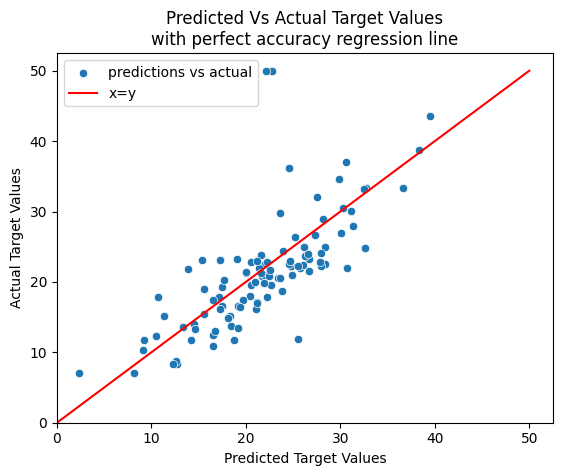

In [79]:
# Visualise performance of each model
sns.scatterplot(x=predictions, y=y_test['MEDV'], label='predictions vs actual')

max_val = max(max(y_test['MEDV']), max(predictions))

plt.plot([0, max_val], [0 ,max_val], 'red', label='x=y')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel('Predicted Target Values')
plt.ylabel('Actual Target Values')
plt.title(f'Predicted Vs Actual Target Values\nwith perfect accuracy regression line')

plt.legend()
plt.show()

---
### log_MEDV model

In [96]:
pred_train = linreg_logy.predict(X_train[trans_sig_features])
#pred_train = np.exp(pred_train)

print("Train Error:")
print("MAE train:", metrics.mean_absolute_error(y_train['log_MEDV'], pred_train))
print("MSE train:", metrics.mean_squared_error(y_train['log_MEDV'], pred_train))
print("RMSE train:", np.sqrt(metrics.mean_squared_error(y_train['log_MEDV'], pred_train)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_train['log_MEDV'], pred_train))
print("R2 train:", linreg.score(X_train[trans_sig_features], y_train['log_MEDV']))
print()
print("Test Error:")
print("MAE test:", metrics.mean_absolute_error(y_test['log_MEDV'], pred_log_y))
print("MSE test:", metrics.mean_squared_error(y_test['log_MEDV'], pred_log_y))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test['log_MEDV'], pred_log_y)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test['log_MEDV'], pred_log_y))
print("R2 test:", linreg.score(X_test[trans_sig_features], y_test['log_MEDV']))

Train Error:
MAE train: 0.15620560169182632
MSE train: 0.043935711203668966
RMSE train: 0.2096084712116115
MAPE: 0.05479478459963241
R2 train: -2630.634588908869

Test Error:
MAE test: 0.16158454179538048
MSE test: 0.055238236800840425
RMSE test: 0.2350281617186341
MAPE: 0.055508155504528624
R2 test: -2716.147251387475


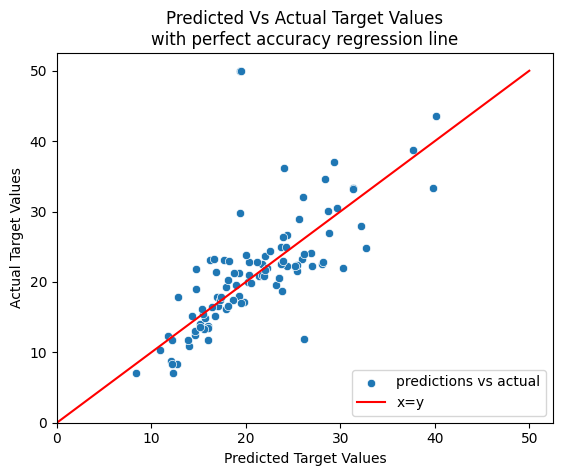

In [93]:
# Visualise performance of each model
sns.scatterplot(x=predictions_log_y, y=y_test['MEDV'], label='predictions vs actual')

max_val = max(max(y_test['MEDV']), max(pred_log_y))

plt.plot([0, max_val], [0 ,max_val], 'red', label='x=y')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel('Predicted Target Values')
plt.ylabel('Actual Target Values')
plt.title(f'Predicted Vs Actual Target Values\nwith perfect accuracy regression line')

plt.legend()
plt.show()

---
### boxcox model

In [91]:
pred_train = linreg_boxcoxy.predict(X_train[trans_sig_features])
pred_train = inv_boxcox(pred_train, lambda_boxcox)

print("Train Error:")
print("MAE train:", metrics.mean_absolute_error(y_train['MEDV'], pred_train))
print("MSE train:", metrics.mean_squared_error(y_train['MEDV'], pred_train))
print("RMSE train:", np.sqrt(metrics.mean_squared_error(y_train['MEDV'], pred_train)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_train['MEDV'], pred_train))
print("R2 train:", linreg.score(X_train[trans_sig_features], y_train['MEDV_boxcox']))
print()
print("Test Error:")
print("MAE test:", metrics.mean_absolute_error(y_test['MEDV'], predictions_boxcox_y))
print("MSE test:", metrics.mean_squared_error(y_test['MEDV'], predictions_boxcox_y))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test['MEDV'], predictions_boxcox_y)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test['MEDV'], predictions_boxcox_y))
print("R2 test:", linreg.score(X_test[trans_sig_features], y_test['MEDV_boxcox']))

Train Error:
MAE train: 3.344760822969848
MSE train: 20.3208703952081
RMSE train: 4.5078676106567395
MAPE: 0.16168470814458294
R2 train: -626.4694072838596

Test Error:
MAE test: 3.406944473138633
MSE test: 31.87949603899647
RMSE test: 5.646193057184325
MAPE: 0.16280214935256826
R2 test: -662.4367522655649


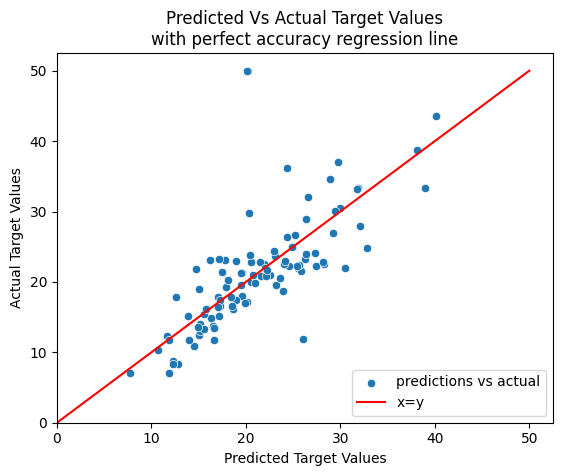

In [75]:
# Visualise performance of each model
sns.scatterplot(x=predictions_boxcox_y, y=y_test['MEDV'], label='predictions vs actual')

max_val = max(max(y_test['MEDV']), max(predictions_boxcox_y))

plt.plot([0, max_val], [0 ,max_val], 'red', label='x=y')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel('Predicted Target Values')
plt.ylabel('Actual Target Values')
plt.title(f'Predicted Vs Actual Target Values\nwith perfect accuracy regression line')

plt.legend()
plt.show()

---
### Yeo-Johnson Target model

In [92]:
pred_train = linreg_yeojoy.predict(X_train[trans_sig_features])
pred_train_reshaped = pred_train.reshape(-1,1)
pred_train = pt.inverse_transform(pred_train_reshaped)

print("Train Error:")
print("MAE train:", metrics.mean_absolute_error(y_train['MEDV'], pred_train))
print("MSE train:", metrics.mean_squared_error(y_train['MEDV'], pred_train))
print("RMSE train:", np.sqrt(metrics.mean_squared_error(y_train['MEDV'], pred_train)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_train['MEDV'], pred_train))
print("R2 train:", linreg.score(X_train[trans_sig_features], y_train['MEDV_YEOJO']))
print()
print("Test Error:")
print("MAE test:", metrics.mean_absolute_error(y_test['MEDV'], predictions_yeojo_y))
print("MSE test:", metrics.mean_squared_error(y_test['MEDV'], predictions_yeojo_y))
print("RMSE test:", np.sqrt(metrics.mean_squared_error(y_test['MEDV'], predictions_yeojo_y)))
print("MAPE:", metrics.mean_absolute_percentage_error(y_test['MEDV'], predictions_yeojo_y))
print("R2 test:", linreg.score(X_test[trans_sig_features], y_test['MEDV_YEOJO']))

Train Error:
MAE train: 3.334318305415877
MSE train: 20.461639574606494
RMSE train: 4.52345438515815
MAPE: 0.16027685644153822
R2 train: -553.1359672789072

Test Error:
MAE test: 3.394958180764024
MSE test: 31.854142395588116
RMSE test: 5.643947412546304
MAPE: 0.1612689089981949
R2 test: -603.5277717751922


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


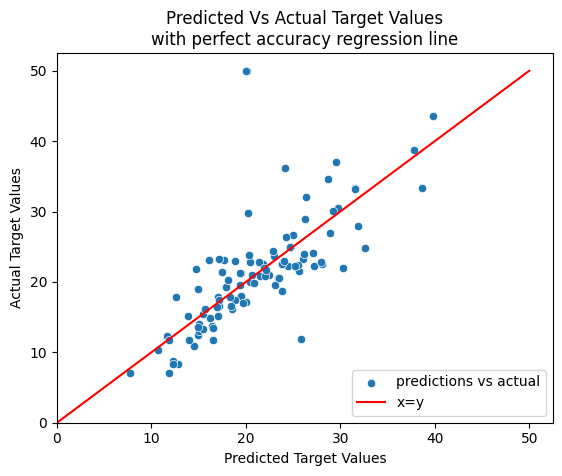

In [80]:
# Visualise performance of each model
sns.scatterplot(x=predictions_yeojo_y.flatten(), y=y_test['MEDV'], label='predictions vs actual')

max_val = max(max(y_test['MEDV']), max(predictions_yeojo_y.flatten()))

plt.plot([0, max_val], [0 ,max_val], 'red', label='x=y')

plt.xlim(left=0)
plt.ylim(bottom=0)

plt.xlabel('Predicted Target Values')
plt.ylabel('Actual Target Values')
plt.title(f'Predicted Vs Actual Target Values\nwith perfect accuracy regression line')

plt.legend()
plt.show()